# Название проекта: Анализ баз данных сервиса для чтения книг по подписке

**Цель исследования**

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Необходимо проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Задачи исследования**

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так исключаем из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

**Исходные данные**

- **Таблица books** - содержит данные о книгах:
    - book_id — идентификатор книги;
    - author_id — идентификатор автора;
    - title — название книги;
    - num_pages — количество страниц;
    - publication_date — дата публикации книги;
    - publisher_id — идентификатор издателя.
    
- **Таблица authors** - содержит данные об авторах:
    - author_id — идентификатор автора;
    - author — имя автора.
    
- **Таблица publishers** - содержит данные об издательствах:
    - publisher_id — идентификатор издательства;
    - publisher — название издательства.
    
- **Таблица ratings** - содержит данные о пользовательских оценках книг:
    - rating_id — идентификатор оценки;
    - book_id — идентификатор книги;
    - username — имя пользователя, оставившего оценку;
    - rating — оценка книги.
    
- **Таблица reviews** - содержит данные о пользовательских обзорах на книги:
    - review_id — идентификатор обзора;
    - book_id — идентификатор книги;
    - username — имя пользователя, написавшего обзор;
    - text — текст обзора.
    
                                               Взаимосвязь между базами данных
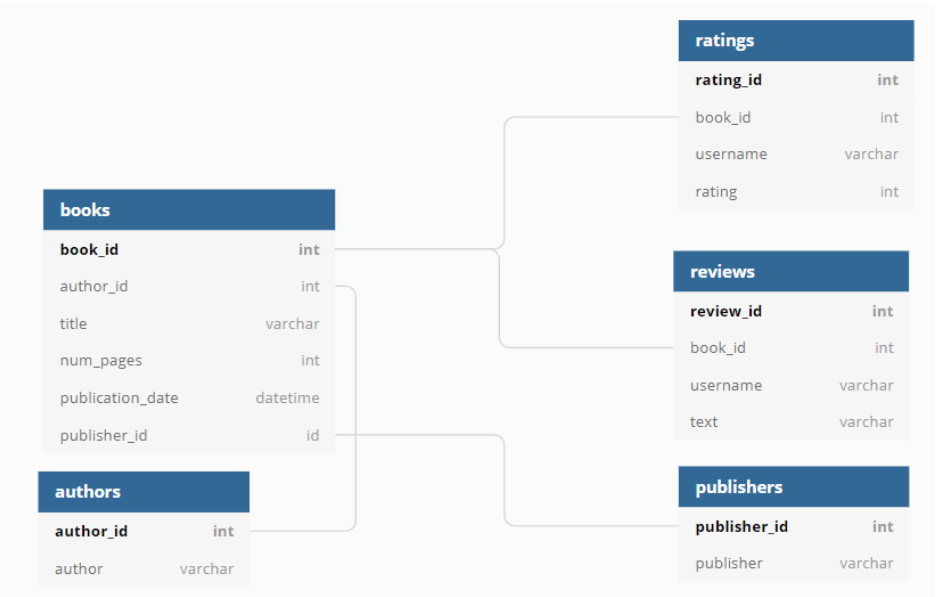

## Изучение файлов с данными, получение общей информации, загрузка библиотек

In [1]:
# импортировали библиотеки
import pandas as pd
import sqlalchemy as sa

In [2]:
# установили параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db' # название базы данных
            }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

In [3]:
# сохранили коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

In [4]:
# чтобы выполнить SQL-запрос, написали функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

Исследум таблицы — выведем первые строки, посчитаем количество строк в каждой таблице.

In [5]:
#записали список таблиц в переменную tables
tables = ['books', 'authors', 'publishers', 'ratings', 'reviews']
tables

['books', 'authors', 'publishers', 'ratings', 'reviews']

Напишем функцию, которая будет выводить таблицу, первые 5 строк и количество всего строк из SQL запроса

In [6]:
# написали функцию котрая выводить первые 5 строк таблицы и количество строк из SQL запросов
def info(tables):
    for i in tables:
        info = f'''
        SELECT * 
        FROM {i} 
        LIMIT 5
        '''
        count = f'''
        SELECT count(*) 
        FROM {i}
        '''
        print(f'Taблица - {i}, вывели первые 5 строк')
        display(get_sql_data(info))
        print(f'Количество строк в таблице - {get_sql_data(count).iat[0,0]}')
        print(100*'*')

In [7]:
#применили функцию
info(tables)

Taблица - books, вывели первые 5 строк


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Количество строк в таблице - 1000
****************************************************************************************************
Taблица - authors, вывели первые 5 строк


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Количество строк в таблице - 636
****************************************************************************************************
Taблица - publishers, вывели первые 5 строк


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Количество строк в таблице - 340
****************************************************************************************************
Taблица - ratings, вывели первые 5 строк


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Количество строк в таблице - 6456
****************************************************************************************************
Taблица - reviews, вывели первые 5 строк


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Количество строк в таблице - 2793
****************************************************************************************************


В текущем разделе вывели таблицы из SQL запроса, посмотрели на первые 5 строк, сверили с описанием, определили с помощью SQL запроса количество строк в таблице. Далее решим поставленные задачи с помощью запросов SQL.

## Задача 1 - Посчитать, сколько книг вышло после 1 января 2000 года

Посчитаем сколько книг вышло после 1 января 2000 года

In [8]:
book = f'''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''

In [9]:
print('После 1 января 2000 года вышло - {} книг'.format(get_sql_data(book).iat[0,0]))

После 1 января 2000 года вышло - 819 книг


С помощью SQL запроса определи, что после 1 января 2000 года вышло 819 книг.

## Задача 2 - Для каждой книги посчитать количество обзоров и среднюю оценку

Для каждой книги посчитаем количество обзоров и среднюю оценку

In [10]:
book_rating = f'''

SELECT b.book_id, title,
       COUNT(DISTINCT(r.review_id)) AS review_count,
       ROUND(AVG(rat.rating), 2) AS avg_rating
FROM books AS b
LEFT JOIN reviews AS r ON b.book_id=r.book_id
LEFT JOIN ratings AS rat ON b.book_id=rat.book_id
GROUP BY b.book_id, title
ORDER BY avg_rating DESC, review_count DESC
'''

In [11]:
display(get_sql_data(book_rating))

,book_id,title,review_count,avg_rating
0,17,A Dirty Job (Grim Reaper #1),4,5.00
1,553,School's Out—Forever (Maximum Ride #2),3,5.00
2,444,Moneyball: The Art of Winning an Unfair Game,3,5.00
3,642,The Big Bad Wolf (Alex Cross #9),2,5.00
4,967,Welcome to Temptation (Dempseys #1),2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,202,Drowning Ruth,3,2.00
997,316,His Excellency: George Washington,2,2.00
998,371,Junky,2,2.00


С помощью SQL запроса для каждой книги посчитали количество обзоров и среднию оценку. С максимальной оценкой и количеством обзоров оказалась книга A Dirty Job (Grim Reaper #1).

## Задача 3 - Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц

In [12]:
publisher = f'''

SELECT p.publisher AS publisher, 
        COUNT(b.book_id) AS count
FROM books AS b JOIN publishers AS p ON b.publisher_id=p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(b.book_id) DESC
LIMIT 1

'''

In [13]:
print(
    f'''
    Издательство, которое выпустило наибольшее число книг толще 50 страниц - {get_sql_data(publisher).iat[0,0]},
    количество книг составляет - {get_sql_data(publisher).iat[0,1]}
    '''
)


    Издательство, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books,
    количество книг составляет - 42
    


С помощью SQL запроса определили издательство которое выпустило наибольшее число книг толще 50 страниц, это Penguin Books.

## Задача 4 - Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками

Определим автора с самой высокой средней оценкой книг — учитывать будем только книги с 50 и более оценками

In [14]:
author = f'''
SELECT author,
       ROUND(AVG(r.rating),2)
FROM books AS b 
JOIN author AS a ON b.author_id=a.author_id
JOIN ratings AS r ON b.book_id=r.book_id
WHERE b.book_id IN (
                  SELECT book_id
                  FROM ratings
                  GROUP BY book_id
                  HAVING COUNT(rating) >= 50
                 )
GROUP BY author
ORDER BY AVG(r.rating) DESC
LIMIT 1
'''

In [15]:
print(f'''
Автор с самой высокой средней оценкой книг - {get_sql_data(author).iat[0,0]}
''')


Автор с самой высокой средней оценкой книг - J.K. Rowling/Mary GrandPré



С помощью SQL запроса определили автора с самой высокой средней оценкой книг, это J.K. Rowling/Mary GrandPré

## Задача 5 - Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [16]:
user = f'''
WITH
review_avg AS (
SELECT username,
       COUNT(DISTINCT(review_id))
FROM reviews
WHERE username IN (
                   SELECT username
                   FROM ratings
                   GROUP BY username
                   HAVING COUNT(rating_id) > 48
                  )
GROUP BY username
)
SELECT ROUND(AVG(count))
FROM review_avg
'''

In [17]:
print(f'''
Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет {get_sql_data(user).iat[0,0]}
''')


Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок составляет 24.0



С помощью SQL запроса посчитали среднее количество обзоров от пользователей, которые поставили больше 48 оценок, оно равняется 24.

## Вывод

В исследовании проанализировали базу данных состоящую из 5 таблиц. Вывели по каждой таблице 5 строк и количество строк с помощью SQL запросов. Также с помощью запросов ответили на задачи исследования.